In [3]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [2]:
pip install tensorflow

  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
                                              0.0/300.9 MB ? eta -:--:--
                                              0.0/300.9 MB 1.3 MB/s eta 0:03:56
                                              0.0/300.9 MB 1.3 MB/s eta 0:03:56
                                            0.1/300.9 MB 573.4 kB/s eta 0:08:45
                                            0.1/300.9 MB 653.6 kB/s eta 0:07:41
                                            0.2/300.9 MB 706.2 kB/s eta 0:07:06
                                            0.2/300.9 MB 860.2 kB/s eta 0:05:50
                                            0.2/300.9 MB 860.2 kB/s eta 0:05:50
                                            0.3/300.9 MB 824.9 kB/s eta 0:06:05
                                            0.4/300.9 MB 857.5 kB/s eta 0:05:51
                                            0.5/300.9 MB 972.0 kB/s eta 0:05:10
                                              0.5/300.9 MB 

     -----                                 45.3/300.9 MB 236.8 kB/s eta 0:18:00
     -----                                 45.3/300.9 MB 236.8 kB/s eta 0:18:00
     -----                                 45.3/300.9 MB 238.1 kB/s eta 0:17:54
     -----                                 45.3/300.9 MB 238.1 kB/s eta 0:17:54
     -----                                 45.3/300.9 MB 237.5 kB/s eta 0:17:57
     -----                                 45.3/300.9 MB 237.5 kB/s eta 0:17:57
     -----                                 45.4/300.9 MB 238.3 kB/s eta 0:17:53
     -----                                 45.4/300.9 MB 238.3 kB/s eta 0:17:53
     -----                                 45.4/300.9 MB 238.1 kB/s eta 0:17:54
     -----                                 45.4/300.9 MB 238.6 kB/s eta 0:17:52
     -----                                 45.4/300.9 MB 238.6 kB/s eta 0:17:52
     -----                                 45.4/300.9 MB 238.6 kB/s eta 0:17:51
     -----                              

In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [6]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv('creditcard.csv')

In [23]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [25]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [26]:
# Good No Null Values!
data.isnull().sum().max()

0

In [27]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [28]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

KeyError: 'Class'

# Note: Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

EDA

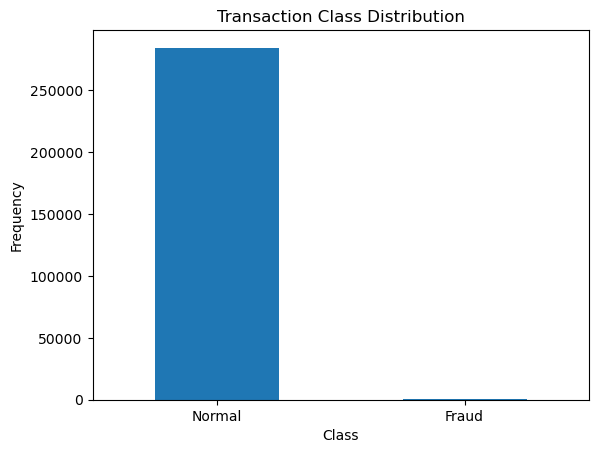

In [32]:
LABELS = ["Normal", "Fraud"]

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [31]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Determine the number of fraud and valid transactions in the entire dataset.

In [33]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (492, 31)
Shape of Non-Fraudulant transactions: (284315, 31)


In [34]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [35]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


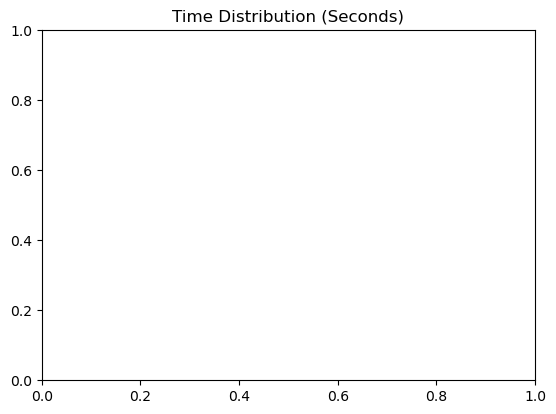

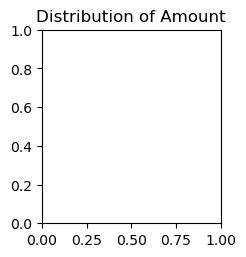

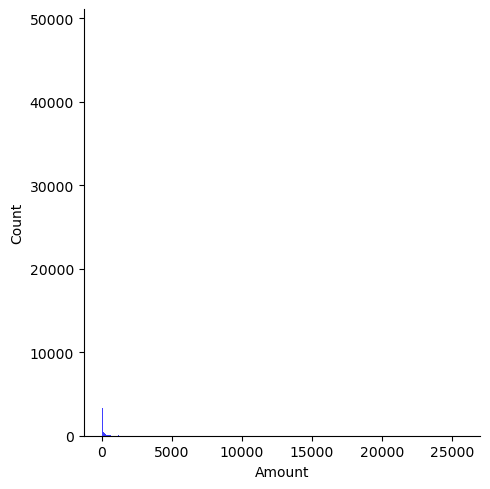

In [36]:
# plot the time feature
plt.figure(figsize=(14,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.displot(data['Time'], color='blue');

#plot the amount feature
plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.displot(data['Amount'],color='blue');

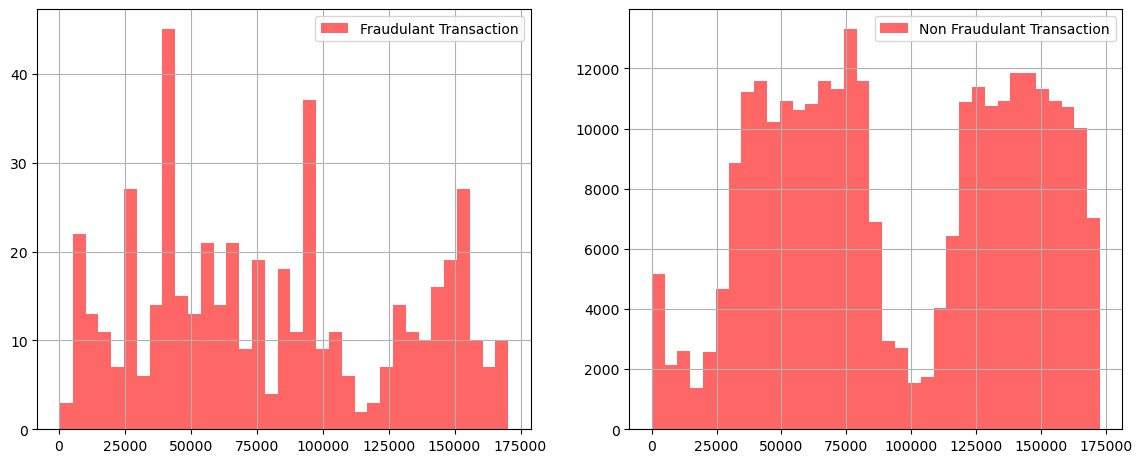

In [39]:
# data[data.Class == 0].Time.hist(bins=35, color='red', alpha=0.6)
plt.figure(figsize=(14, 12))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='red', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='red', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

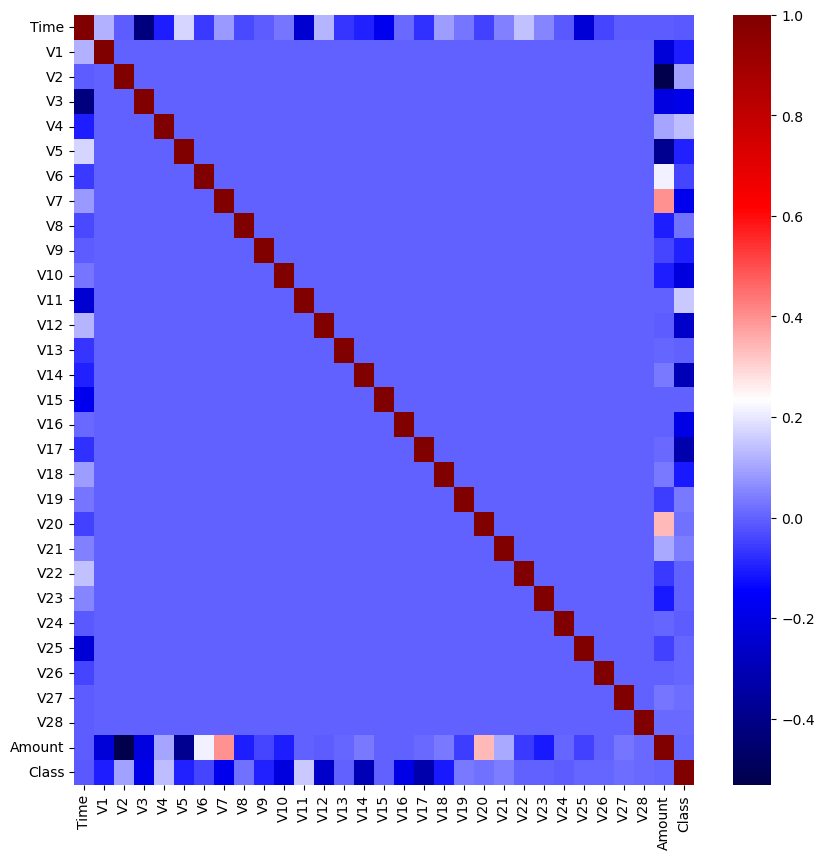

In [40]:
# heatmap to find any high correlations

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), cmap="seismic")
plt.show();

Highest correlations come from:
- Time & V3 (-0.42)
- Amount & V2 (-0.53)
- Amount & V4 (0.4)

While these correlations are high, I don't expect it to run the risk of multicollinearity.

The correlation matrix shows also that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

# 3. Data Pre-processing¶
Time and Amount should be scaled as the other columns

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('Class', axis=1)
y = data.Class

X_train_v, X_test, y_train_v, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_v, y_train_v, 
                                                            test_size=0.2, random_state=42)

X_train = scalar.fit_transform(X_train)
X_validate = scalar.transform(X_validate)
X_test = scalar.transform(X_test)

w_p = y_train.value_counts()[0] / len(y_train)
w_n = y_train.value_counts()[1] / len(y_train)

print(f"Fraudulant transaction weight: {w_n}")
print(f"Non-Fraudulant transaction weight: {w_p}")

Fraudulant transaction weight: 0.0017994745785028623
Non-Fraudulant transaction weight: 0.9982005254214972


In [45]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'_'*55}")
print(f"VALIDATION: X_validate: {X_validate.shape}, y_validate: {y_validate.shape}\n{'_'*50}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (159491, 30), y_train: (159491,)
_______________________________________________________
VALIDATION: X_validate: (39873, 30), y_validate: (39873,)
__________________________________________________
TESTING: X_test: (85443, 30), y_test: (85443,)


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 

# Model Building

# 1. Artificial Neural Network (ANNs)

In [47]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               

In [48]:
METRICS = [
#     keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

model.compile(optimizer=keras.optimizers.Adam(1e-4), loss='binary_crossentropy', metrics=METRICS)

callbacks = [keras.callbacks.ModelCheckpoint('fraud_model_at_epoch_{epoch}.h5')]
class_weight = {0:w_p, 1:w_n}

r = model.fit(
    X_train, y_train, 
    validation_data=(X_validate, y_validate),
    batch_size=2048, 
    epochs=300, 
#     class_weight=class_weight,
    callbacks=callbacks,
)

Epoch 1/300

78/78 [==============================] - 7s 55ms/step - loss: 0.8162 - fn: 79.0000 - fp: 73617.0000 - tn: 85587.0000 - tp: 208.0000 - precision: 0.0028 - recall: 0.7247 - val_loss: 0.6560 - val_fn: 7.0000 - val_fp: 9301.0000 - val_tn: 30503.0000 - val_tp: 62.0000 - val_precision: 0.0066 - val_recall: 0.8986
Epoch 2/300
78/78 [==============================] - 4s 51ms/step - loss: 0.6937 - fn: 41.0000 - fp: 61440.0000 - tn: 97764.0000 - tp: 246.0000 - precision: 0.0040 - recall: 0.8571 - val_loss: 0.6071 - val_fn: 12.0000 - val_fp: 4285.0000 - val_tn: 35519.0000 - val_tp: 57.0000 - val_precision: 0.0131 - val_recall: 0.8261
Epoch 3/300
78/78 [==============================] - 4s 54ms/step - loss: 0.6111 - fn: 45.0000 - fp: 48667.0000 - tn: 110537.0000 - tp: 242.0000 - precision: 0.0049 - recall: 0.8432 - val_loss: 0.5247 - val_fn: 13.0000 - val_fp: 731.0000 - val_tn: 39073.0000 - val_tp: 56.0000 - val_precision: 0.0712 - val_recall: 0.8116
Epoch 4/300
78/78 [===============

In [53]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               7936      
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 256)              

In [54]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_score(y_train, y_train_pred.round(), train=True)
print_score(y_test, y_test_pred.round(), train=False)

scores_dict = {
    'ANNs': {
        'Train': f1_score(y_train, y_train_pred.round()),
        'Test': f1_score(y_test, y_test_pred.round()),
    },
}

2671/2671 [==============================] - 6s 2ms/step
Train Result:
Accuracy Score: 90.57%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.998051    0.000339  0.905662       0.499195       0.996256
recall          0.907264    0.017422  0.905662       0.462343       0.905662
f1-score        0.950495    0.000664  0.905662       0.475579       0.948785
support    159204.000000  287.000000  0.905662  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[144440  14764]
 [   282      5]]

Test Result:
Accuracy Score: 90.69%
_______________________________________________
Classification Report:
                      0      1  accuracy     macro avg  weighted avg
precision      0.998248    0.0  0.906897      0.499124      0.996659
recall         0.908343    0.0  0.906897      0.454171      0.906897
f1-score       0.951176    0.0  

# XGBoost

In [60]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [62]:
# from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['XGBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}


Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.948718  0.999637      0.974212      0.999626
recall         0.999930    0.816176  0.999637      0.908053      0.999637
f1-score       0.999818    0.877470  0.999637      0.938644      0.999624
support    85307.000000  136.000000  0.999637  85443.000000  85443.000000


# 3. Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, oob_score=False)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['Random Forest'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    159204.0  287.0       1.0   159491.0      159491.0
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     0    287]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.909836  0.999579      0.954772      0.999564
recall         0.999871    0.816176  0.999579      0.908024      0.999579
f1-score       0.999789    0.860465  0.999579      0.930127      0.999567
support    85307.000000  136.000000  0.999579  85443.000000  85443.000000


# CatBoost

In [86]:
!pip install catboost

In [87]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train)

Learning rate set to 0.089847
0:	learn: 0.3914637	total: 41.1ms	remaining: 41s
1:	learn: 0.2368418	total: 86.9ms	remaining: 43.4s
2:	learn: 0.1341780	total: 134ms	remaining: 44.5s
3:	learn: 0.0788514	total: 172ms	remaining: 42.9s
4:	learn: 0.0482949	total: 219ms	remaining: 43.6s
5:	learn: 0.0315326	total: 257ms	remaining: 42.5s
6:	learn: 0.0213628	total: 297ms	remaining: 42.2s
7:	learn: 0.0153604	total: 337ms	remaining: 41.8s
8:	learn: 0.0115137	total: 374ms	remaining: 41.2s
9:	learn: 0.0090128	total: 416ms	remaining: 41.2s
10:	learn: 0.0071550	total: 461ms	remaining: 41.4s
11:	learn: 0.0060638	total: 499ms	remaining: 41.1s
12:	learn: 0.0052453	total: 539ms	remaining: 40.9s
13:	learn: 0.0046542	total: 573ms	remaining: 40.4s
14:	learn: 0.0042229	total: 610ms	remaining: 40s
15:	learn: 0.0038780	total: 647ms	remaining: 39.8s
16:	learn: 0.0036112	total: 683ms	remaining: 39.5s
17:	learn: 0.0034152	total: 725ms	remaining: 39.6s
18:	learn: 0.0032511	total: 762ms	remaining: 39.3s
19:	learn: 0.

In [88]:
y_train_pred = cb_clf.predict(X_train)
y_test_pred = cb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

scores_dict['CatBoost'] = {
        'Train': f1_score(y_train,y_train_pred),
        'Test': f1_score(y_test, y_test_pred),
}

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                       0           1  accuracy      macro avg   weighted avg
precision       0.999994    1.000000  0.999994       0.999997       0.999994
recall          1.000000    0.996516  0.999994       0.998258       0.999994
f1-score        0.999997    0.998255  0.999994       0.999126       0.999994
support    159204.000000  287.000000  0.999994  159491.000000  159491.000000
_______________________________________________
Confusion Matrix: 
 [[159204      0]
 [     1    286]]

Test Result:
Accuracy Score: 99.96%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999707    0.932773  0.999614      0.966240      0.999600
recall         0.999906    0.816176  0.999614      0.908041      0.999614
f1-score       0.999807    0.870588  0.999614      0.935197      0.999601

# Model Comparaison

<Axes: >

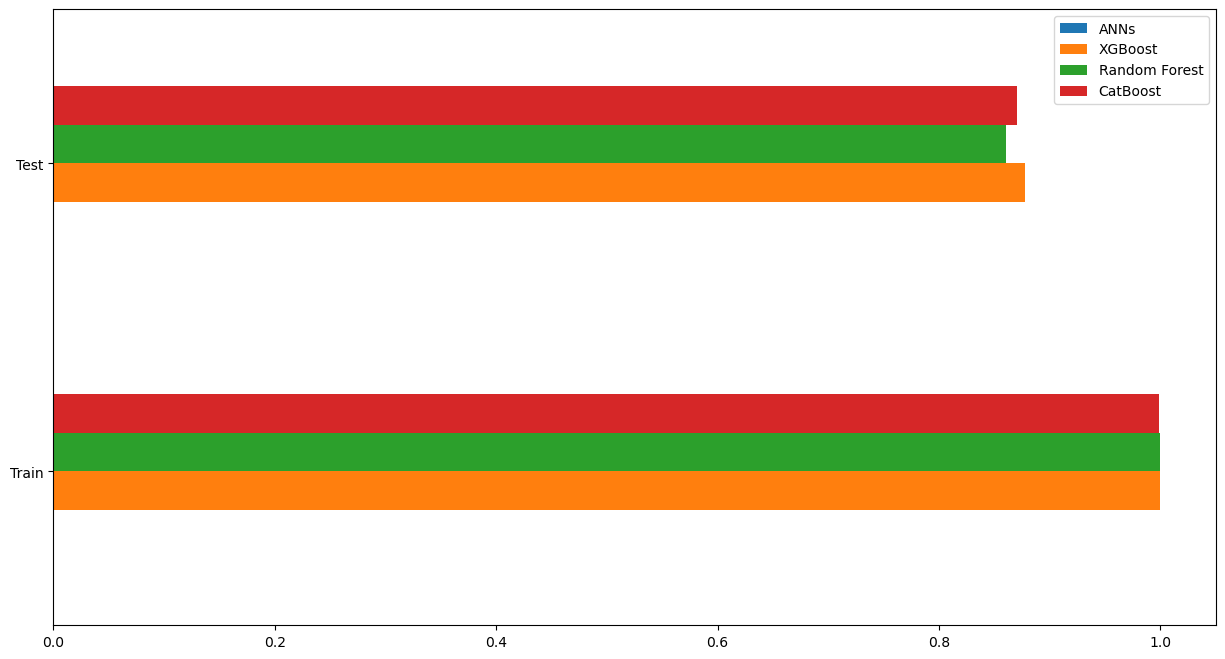

In [97]:
scores_df = pd.DataFrame(scores_dict)

scores_df.plot(kind='barh', figsize=(15, 8))